In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import networkx as nx


In [55]:
# Load datasets
bar_df = pd.read_csv('bar_assignment.csv')  # Ensure this file is in the same directory
sankey_df = pd.read_csv('sankey_assignment.csv')
network_df = pd.read_csv('networks_assignment.csv')


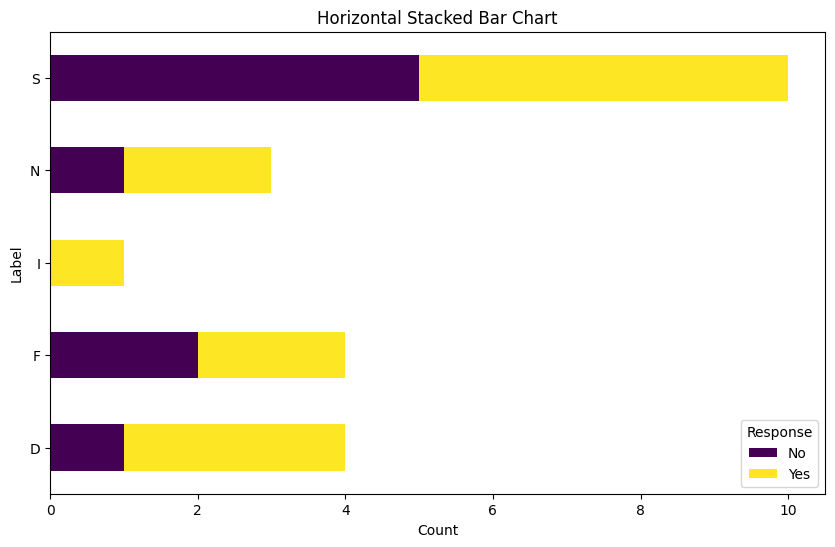

In [56]:
# Convert 1 to 'Yes' and 0 to 'No'
bar_df['COUNT'] = bar_df['COUNT'].map({1: 'Yes', 0: 'No'})

# Create a horizontal stacked bar chart
bar_pivot = bar_df.pivot_table(index='LABEL', columns='COUNT', aggfunc=len, fill_value=0)
bar_pivot.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Horizontal Stacked Bar Chart')
plt.xlabel('Count')
plt.ylabel('Label')
plt.legend(title='Response')
plt.show()


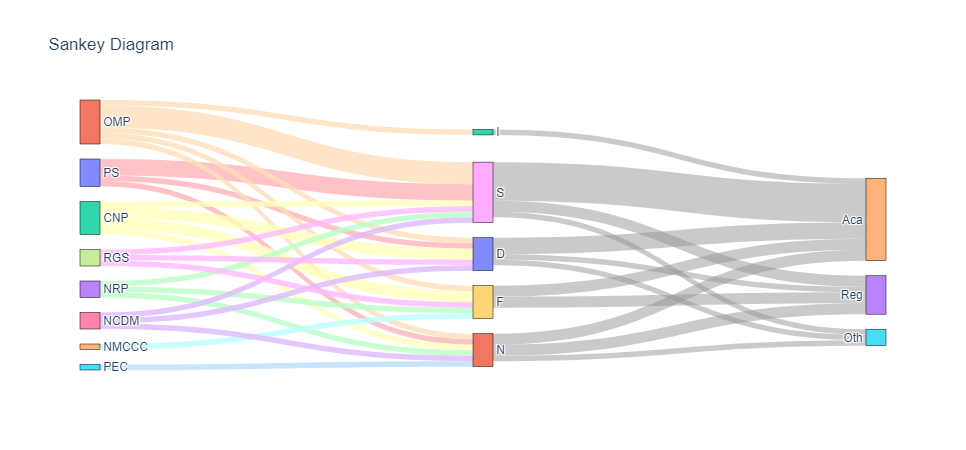

In [1]:
import pandas as pd
import plotly.graph_objects as go
from IPython.display import display  # For displaying images in Jupyter Notebook
from PIL import Image  # For opening and displaying the saved image

# Load the CSV file
df = pd.read_csv('d:/2nd year/Data analytics/assignment/assignment 2/sankey_assignment.csv')

# Define source and target labels
sources = ['PS', 'OMP', 'CNP', 'NRP', 'NMCCC', 'PEC', 'NCDM', 'RGS']
labels = df['LABEL'].tolist()
targets = ['Reg', 'Aca', 'Oth']

# Lists to store Sankey data
source_indices = []
target_indices = []
values = []
colors = []

# Define pastel colors for the links
pastel_colors = [
    'rgba(255, 179, 186, 0.8)',  # Soft Red
    'rgba(255, 223, 186, 0.8)',  # Soft Orange
    'rgba(255, 255, 186, 0.8)',  # Soft Yellow
    'rgba(186, 255, 201, 0.8)',  # Soft Green
    'rgba(186, 255, 255, 0.8)',  # Soft Cyan
    'rgba(186, 223, 255, 0.8)',  # Soft Blue
    'rgba(223, 186, 255, 0.8)',  # Soft Purple
    'rgba(255, 186, 255, 0.8)'   # Soft Pink
]

# Map sources to labels
for source in sources:
    for i, label in enumerate(labels):
        value = df[source][i]  # Get the value from the CSV
        if value > 0:
            source_indices.append(sources.index(source))  # Index of the source
            target_indices.append(len(sources) + i)  # Index of the label
            values.append(value)  # Flow value
            colors.append(pastel_colors[sources.index(source)])  # Assign a color

# Map labels to final targets (Reg, Aca, Oth)
for i, label in enumerate(labels):
    for target in targets:
        value = df[target][i]  # Get the value from the CSV
        if value > 0:
            source_indices.append(len(sources) + i)  # Index of the label
            target_indices.append(len(sources) + len(labels) + targets.index(target))  # Index of final target
            values.append(value)  # Flow value
            colors.append("rgba(150, 150, 150, 0.5)")  # Neutral color for final targets

# Combine all nodes into one list
node_labels = sources + labels + targets

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=node_labels
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values,
        color=colors
    )
)])

# Update layout (Set font to Arial, size to 12, and match uploaded image dimensions)
fig.update_layout(
    title_text="Sankey Diagram",
    font=dict(
        family="Arial",
        size=12
    ),
    width=966,  # Set width to match the uploaded image
    height=450  # Set height to match the uploaded image
)

# Save as PNG (for GitHub)
fig.write_image("sankey_diagram.png", width=966, height=450)

# Save as HTML (for interactive version)
fig.write_html("sankey_diagram.html")

# Display the saved image
img = Image.open("sankey_diagram.png")
display(img)

# Show the interactive figure
fig.show()


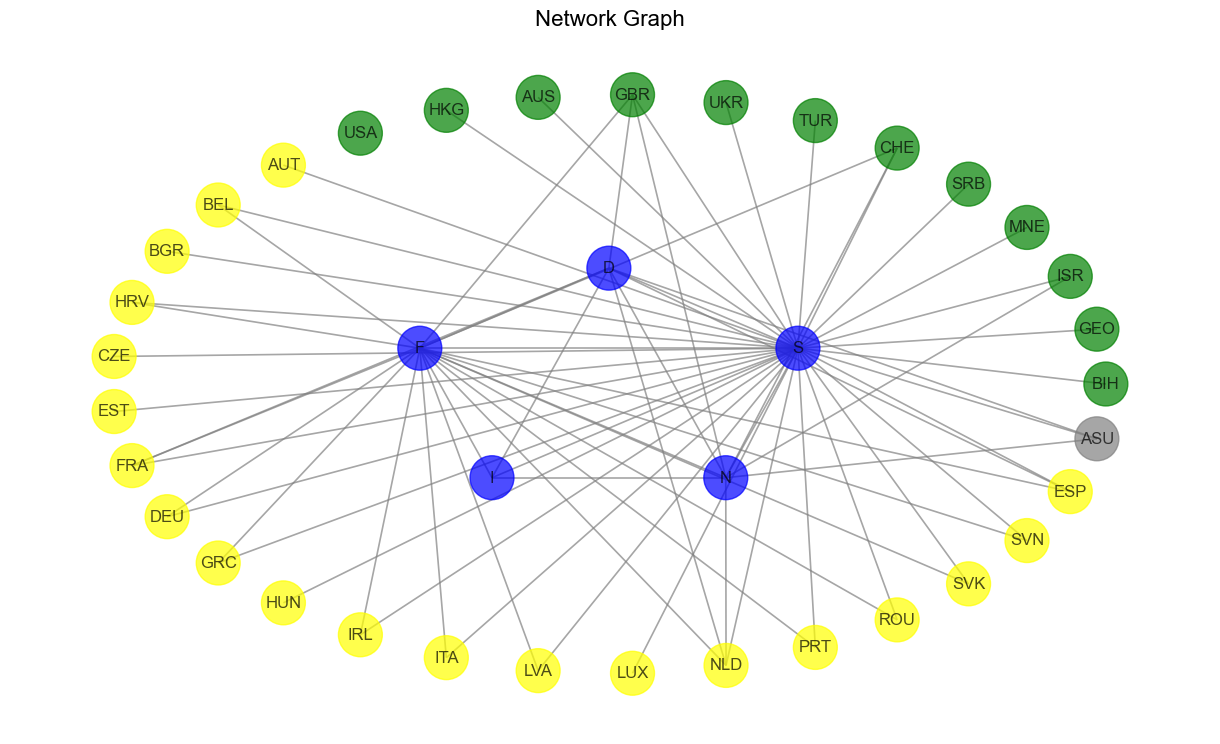

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


G = nx.Graph()

blue_nodes = ['D', 'F', 'I', 'N', 'S']
green_nodes = ['BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'USA']
yellow_nodes = ['AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP']
grey_nodes = ['ASU']


for node in blue_nodes:
    G.add_node(node, color="blue")
for node in green_nodes:
    G.add_node(node, color="green")
for node in yellow_nodes:
    G.add_node(node, color="yellow")
for node in grey_nodes:
    G.add_node(node, color="grey")


edges = [
    ('D', 'N'), ('D', 'F'), ('D', 'I'), ('D', 'S'), ('D', 'FRA'),
    ('D', 'NLD'), ('D', 'ESP'), ('D', 'GBR'), ('D', 'ASU'),
    ('F', 'N'), ('F', 'D'), ('F', 'I'), ('F', 'S'), ('F', 'BEL'),
    ('F', 'HRV'), ('F', 'FRA'), ('F', 'DEU'), ('F', 'GRC'), ('F', 'IRL'),
    ('F', 'ITA'), ('F', 'LVA'), ('F', 'NLD'), ('F', 'PRT'), ('F', 'ROU'),
    ('F', 'SVK'), ('F', 'SVN'), ('F', 'ESP'), ('F', 'CHE'), ('F', 'GBR'),
    ('N', 'D'), ('N', 'F'), ('N', 'I'), ('N', 'S'), ('N', 'ISR'),
    ('N', 'NLD'), ('N', 'CHE'), ('N', 'GBR'), ('N', 'ASU'),
    ('S', 'D'), ('S', 'F'), ('S', 'I'), ('S', 'AUT'), ('S', 'BEL'),
    ('S', 'BIH'), ('S', 'BGR'), ('S', 'HRV'), ('S', 'CZE'), ('S', 'EST'),
    ('S', 'FRA'), ('S', 'GEO'), ('S', 'DEU'), ('S', 'GRC'), ('S', 'HUN'),
    ('S', 'IRL'), ('S', 'ISR'), ('S', 'ITA'), ('S', 'LVA'), ('S', 'LUX'),
    ('S', 'MNE'), ('S', 'NLD'), ('S', 'PRT'), ('S', 'ROU'), ('S', 'SRB'),
    ('S', 'SVK'), ('S', 'SVN'), ('S', 'ESP'), ('S', 'CHE'), ('S', 'TUR'),
    ('S', 'UKR'), ('S', 'GBR'), ('S', 'AUS'), ('S', 'HKG'), ('S', 'ASU')
]
G.add_edges_from(edges)


pos = {
    'D': (0.0, 1.0), 'F': (-0.951, 0.309), 'I': (-0.588, -0.809),
    'N': (0.588, -0.809), 'S': (0.951, 0.309),
}


outer_radius = 2.5
num_outer_positions = len(green_nodes) + len(yellow_nodes) + len(grey_nodes)
angle_increment = 2 * np.pi / num_outer_positions


outer_labels = green_nodes + yellow_nodes + grey_nodes

for i, label in enumerate(outer_labels):
    angle = i * angle_increment
    x = outer_radius * np.cos(angle)
    y = outer_radius * np.sin(angle)
    pos[label] = (x, y)

node_colors = [G.nodes[node].get('color', 'black') for node in G.nodes]


plt.figure(figsize=(12, 7))
nx.draw(
    G, pos, with_labels=True,
    node_color=node_colors,
    edge_color="gray", alpha=0.7,
    width=1.2, node_size=1000,
    font_size=12, font_color="black", font_family="Arial"
)
plt.title("Network Graph", fontsize=16, fontfamily="Arial")
plt.show()


In [59]:
print("\n--- Explanation ---")
print("1. The bar chart is a horizontal stacked bar plot that transforms 1/0 into Yes/No.")
print("2. The Sankey Diagram connects specific columns to final categories ('Reg', 'Aca', 'Oth').")
print("3. The network graph shows central nodes ('D', 'F', 'I', 'N', 'S') in a pentagram with others outside.")
print("4. Colors are assigned as per the given specifications.")



--- Explanation ---
1. The bar chart is a horizontal stacked bar plot that transforms 1/0 into Yes/No.
2. The Sankey Diagram connects specific columns to final categories ('Reg', 'Aca', 'Oth').
3. The network graph shows central nodes ('D', 'F', 'I', 'N', 'S') in a pentagram with others outside.
4. Colors are assigned as per the given specifications.
